<a href="https://colab.research.google.com/github/jalbury/machine-learning/blob/master/HW_5/HW5_John_Albury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sources

All information here is based on my notes from lectures, the [course notes posted online](https://github.com/schneider128k/machine_learning_course), and the book "Deep Learning with Python" by Francois Chollet.

# Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. General concepts

## Artificial Intelligence


Artificial intelligence is a broad term referring to the study of making computers behave intelligently. Within artificial intelligence, there are two main fields: symbolic artificial intelligence and machine learning.

### Symbolic artificial intelligence

Symbolic artificial intelligence involves explicitly programming computers to behave intelligently by defining symbolic representations of problems.

Typically, a symbolic AI system takes in an input and a set of rules and produces an output. For example, a symbolic AI system meant to play chess might take the positions of pieces on the chess board as input and a set of rules that encode a chess strategy, then produce a chess move as output.



### Machine learning

Machine learning does not involve explicitly programming computers to behave intelligently; instead, machine learning models adjust themselves based on the data they're exposed to.

Instead of being given an input and rules and producing an output, a machine learning model takes in an input and an expected output and creates the rules itself.

There are two main paradigms of machine learning: supervised and unsupervised learning. Most practical problems fall along a spectrum between these two paradigms.

#### Supervised learning

Supervised learning is a type of machine learning where the model is given labeled training data.

For example, a problem that might be solved using supervised learning is classifying the species of a plant according to the measurements of a plant. Measurements of plants, along with their species, would be the labeled training data. The model would learn the relationship between the measurements and the species of plant. Then, given the measurements of a plant, the machine learning model would try to predict the plant's species.

#### Unsupervised learning

Unsupervised learning is a type of machine learning where the model tries to identify meaningful patterns in an unlabeled data set.

For example, a model may be able to delineate between categories in a given data set by looking at how the the data is clustered, although the model would not know what the specific categories mean. Given a new data point, the model would classify it as being in one of these categories.

### Deep Learning

Deep learning is a subset of machine learning, typically referring to the field of deep neural networks. The term "deep" refers to the number of layers in a model. Deep neural networks have multiple hidden layers that allow them to learn complex representations of data.

# 2. Basic concepts

## Linear regression

Linear regression involves predicting the value of some variable based on the features of the input data. For example, you might want to predict the selling price of a home based on the number of bedrooms it has. In this case, there is only 1 feature (the number of bedrooms in the house), and the linear regression model would produce a prediction for the selling price of the house. However, in general there can be an unlimited number of features in linear regression.

Generally, linear regression is defined by $\hat{y} = \sum_{j=1}^{n} w_j x_j + b$ for a single data point. $\hat{y}$ is the prediction of the linear regression model, $w_j$ is the weight given to feature $j$, $x_j$ is the value of feature $j$, and $b$ is the bias term.

## Logistic regression

Logistic regression involves predicting a probability. As an example, we could use logistic regression to predict whether a given image is of a cat or a dog. Since there are only two possiblities (the image is of a cat or of a dog), we can use a single probability for this prediction. The outputted probability could be interpreted as whether the image is of a cat: if the probability is $>= 0.5$, the logistic regression model would predict that the image is of a cat; otherwise, it would predict that the image is of a dog.

Logistic regression is essentially linear regression with a sigmoid function applied to the result. The sigmoid function maps an input value to a value between $0$ and $1$; this ensures that the prediction is a valid probability.

Generally, logistic regression is defined by $\hat{y} = \sigma(\sum_{j=1}^{n} w_j x_j + b)$ for a single data point. $\hat{y}$ is the prediction of the logistic regression model, $\sigma(x) =$ $1 \over 1 + e^{-x}$, $w_j$ is the weight given to feature $j$, $x_j$ is the value of feature $j$, and $b$ is the bias term.

## Loss

Loss is the value that represents the difference between the expected and actual output of a machine learning model. Loss is important because it provides a concrete value for the model to minimize during training. To the model, how "good" or "bad" it performs corresponds to its loss on a given data set. Thus, the model aims to minimize the loss during training by adjusting its parameters.

We mainly talked about two loss functions in this course. First, we discussed  mean squared error (MSE), which is defined as $1 \over 2$ $(y - \hat{y})^2$, where $y$ is the expected output of the model and $\hat{y}$ is the actual output of the model. Second, we discussed binary crossentry, which is defined as $-y \log a - (1 - y) \log (1 - a)$, where $y$ is the expected output of the model and $a$ is the actual output of the model.

## Gradient descent

The gradient ($\nabla$) of a function is a vector whose entries are given by the partial derivatives of the function with respect to each of its parameters. The direction of the vector is the direction of steepest increase of the function.

In the context of machine learning, we are finding the gradient of a loss function $\mathcal{L}$, whose parameters are the weights of the model (for simplicity, we'll consider the biases "weights" as well). For example, the $i^{th}$ entry in $\nabla \mathcal{L}$ is the partial derivative of $\mathcal{L}$ with respect to weight $i$: $\partial \mathcal{L} \over \partial w_i$. $\nabla \mathcal{L}$ tells us how much each weight contributed to the loss (error) of the model for a given example.

Once the gradient of the loss function $\nabla \mathcal{L}$ has been found, we can use its value to update the weights of the model. Since $\nabla \mathcal{L}$ points in the direction of steepest increase of the loss function and we are aiming to *minimize* the loss function, we shift the weights in the opposite direction of the gradient: $-\nabla \mathcal{L}$. To regulate the rate at which weights are updated, a scalar learning rate $\alpha$ is used. The set of weights of the model are then updated as follows: $w = w - \alpha \nabla \mathcal{L}$.

## Activation Functions

Activation functions provide non-linearity to a deep neural network. Without them, the network would simply be a series of affine transformations. A series of affine transformations can be condensed into a single affine transformation, meaning there would be no point to the layered approach of deep neural networks. With activation functions, this is not the case. Multiple hidden layers in the network result in the potential for more complex patterns to be represented by the network.

The main two loss functions we discussed in the course were rectified linear unit (ReLU) and sigmoid.

The ReLU function is defined as $\text{R}(x) = \max(0, x)$. A graph of the ReLU function is shown below.

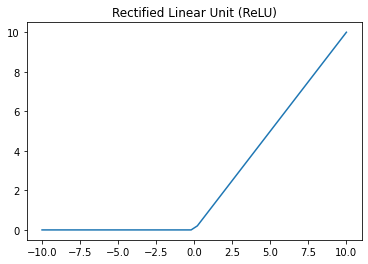

In [23]:
x = np.linspace(-10, 10)
y = np.array([max(0, a) for a in x])
plt.plot(x, y);
plt.title('Rectified Linear Unit (ReLU)');

The sigmoid function is defined as $\sigma(x) =$ $1 \over 1 + e^{-x}$. A graph of the sigmoid function is shown below.

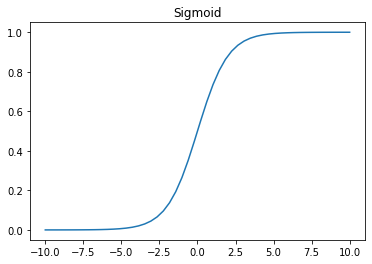

In [25]:
x = np.linspace(-10, 10)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y);
plt.title('Sigmoid');

# 3. Building a model

When building a model, we need to determine the number of layers in the model. In general, the more layers there are in a model, the more complex patterns the model will learn. Too few layers results in poor performance, as the model is not complex enough to learn the underlying pattern of the data. Too many layers results in good performance on the training data but poor performance on new data, as the representation of the data that the model learns is too specific to the training data and does not generalize well.

Then, for each layer in the model, the following hyperparameters need to be determined: the type of layer, the activation function used in the layer, and the output shape of the layer.

An example of building a model using Keras is shown below. This example is from [Dr. Wocjan's notebook on classifying MNIST digits with convolutional layers](https://colab.research.google.com/drive/1HA-PoWkxgYa37McvUrA_n609jkKT5F7m).

In [3]:
# Get training and test data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = tf.keras.datasets.mnist.load_data()
train_images = train_images_original.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images_original.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels_original)
test_labels = tf.keras.utils.to_categorical(test_labels_original)

# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Show a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

## Layer type

The main layer types we discussed in this course were dense layers (`Dense` in Keras), 2D convolutional layers (`Conv2D` in Keras), and 2D max-pooling layers (`MaxPooling2D` in Keras).

Dense layers are the simplest type of layers in a neural network. Every neuron in the layer has an edge to every neuron in the previous layer. Each of these neurons has a weight for every edge coming in to it and a bias term.

Convolutional and max-pooling layers are used in convolutional neural networks. Convolutional layers apply a kernel (the entries of which are learned) to an input tensor to create more abstract representations of the input, such as transforming raw image data into feature maps that represent concepts like "cat ear" or "dog nose." Max-pooling layers are not learned; they simply reduce the size of the input tensor for use in future layers.

## Activation function

The activation function we use for a layer depends on the purpose of the layer. For hidden layers, we typically used the ReLU function in this course. For the output layer, the activation function we use depends on the type of task we are performing.

For linear regression problems, the model outputs a predicted value of some variable, so we used the ReLU function, since it can provide a wide range of values. For binary classification problems, the model outputs a probability (that represents the probability that the given example is in Class B. If the probability is $< 0.5$, we predict that the example is in Class A; otherwise, we predict that the example is in Class B), so we used the sigmoid function, since it maps an input value to a value between $0$ and $1$. For multi-class classification problems, the model outputs several probabilities (one for each class, where the probability for a class represent the probability that the given example is in that class), so we used the softmax function, since it produces values that are all greater than $0$ and sum to $1$.

## Output shape

How the output shape is defined for a layer depends on the type of the layer.

For dense layers, the output shape is a 1D tensor that has as many entries as there are neurons in the layer. Thus, for a dense layer with $n$ neurons, the output is a 1D tensor with $n$ entries.

For 2D convolutional layers, the output shape is a 3D tensor. The height and width of the output tensor depend on the height and width of the input tensor, the size of the kernel used, the stride used, and the type of padding used. The depth of the output tensor is set explicitly as the number of output filters in the convolution.

For 2D max-pooling layers, the output shape is a 3D tensor, where the depth of the output tensor is the same as the depth of the input tensor. The height and width of the output tensor depend on the height and width of the input tensor and the window size used in the max-pooling operation.

# 4. Compiling a model

Once we have defined our model, we must compile it before training. The following hyperparameters need to be determined: the optimizer to use, the loss function to use, and the metrics to track during training.

The compiling of the model built in the previous section (from [Dr. Wocjan's notebook on classifying MNIST digits with convolutional layers](https://colab.research.google.com/drive/1HA-PoWkxgYa37McvUrA_n609jkKT5F7m)) is shown below.

In [0]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Optimizer

The optimizer determines how the parameters of the model are updated based on the gradient of the loss of the model. Optimizers aim to minimize the loss function through some variant of stochastic gradient descent.

See "2. Basic concepts" for a discussion of plain stochastic gradient descent (`sgd` in Keras). We also used RMSProp (`rmsprop` in Keras), one of the variants of stochastic gradient descent, in many of the code examples in this course.

### Learning rate

The learning rate of the model is a hyperparameter related to the optimizer. In Keras, the learning rate of an optimizer can be defined explicitly or left as the default value (the default value depends on the optimizer chosen).

The learning rate is a scalar value that serves as a multiplier for the loss function gradient in order to regulate how much the model updates its weights each time it performs a weight update. Too large of a learning rate can result in the model skipping over good minima in the loss function, while too small of a learning rate results in slow learning (the model may never reach a minimum in the loss function).

## Loss function

The value produced by the loss function represents the difference (the error) between the expected and actual output of the model. The loss function is minimized during the training process, so it should capture the performance of the model as accurately as possible.

The loss function we use often depends on the type of task we are performing. For example, for linear regression problems, we typically use mean squared error (MSE). For binary classification problems, we typically use binary crossentry. For multi-class classification problems, we typically use categorical crossentropy.

## Metrics

Metrics are the variables to track when training the model (besides loss, which is tracked automatically). The metrics chosen have no impact on the model itself; they are provided solely for tracking the performance of the model.

The most common metric we've tracked in this course is accuracy. Knowing the accuracy of a model in a classification task is useful because that is how we typically judge the performance of a classifier. Knowing that a model classifies 95% of the test data correctly, for example, is probably more useful to the end user than the loss of the model on the test data.

# 5. Training a model

Once we have compiled our model, there are two hyperparameters left to configure: batch size and number of epochs.

The batch size refers to the number of examples the model is trained on each time the parameters of the model are updated. In general, we typically use as large of a batch size as our computer will allow, since this results in faster training.

The number of epochs refers to the number of passes through the training data the model performs. Too few epochs does not give the model enough time to learn from the training data and results in poor performance, while too many epochs results in the model becoming too specific to the training data and not performing well on new data.

The training of the model built and compiled in the previous sections (from [Dr. Wocjan's notebook on classifying MNIST digits with convolutional layers](https://colab.research.google.com/drive/1HA-PoWkxgYa37McvUrA_n609jkKT5F7m)), along with the performance of the model, are shown below.

In [7]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=10,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 51s 54ms/step - loss: 0.1805 - accuracy: 0.9418 - val_loss: 0.0497 - val_accuracy: 0.9827
Epoch 2/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0484 - val_accuracy: 0.9835
Epoch 3/10
938/938 [==============================] - 49s 53ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0262 - val_accuracy: 0.9919
Epoch 4/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0245 - accuracy: 0.9928 - val_loss: 0.0255 - val_accuracy: 0.9929
Epoch 5/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0316 - val_accuracy: 0.9913
Epoch 6/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0622 - val_accuracy: 0.9819
Epoch 7/10
938/938 [==============================] - 52s 56ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.0258 - val_accuracy:

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, 11)

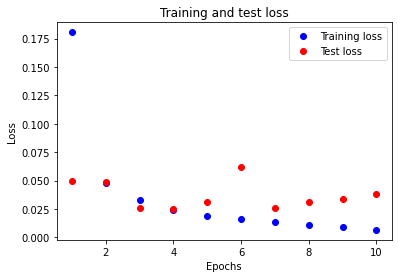

In [10]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

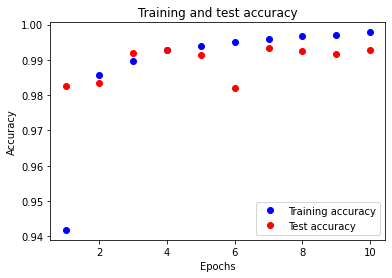

In [11]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Overfitting vs. underfitting

Overfitting occurs when a machine learning model fits its training data too closely. Although the model will appear to perform well based on its performance on the training set, it does not perform well on data it hasn't seen before because the model is not general enough. This can occur if the model is too complex or if it is trained for too many epochs.

Underfitting occurs when a machine learning model is not able to fit its training data closely enough. The model does not perform well in general because it does not have an adequate representation of the underlying pattern of the data set. This can occur if the model is not complex enough or if it is not trained for enough epochs.

## Mitigating overfitting

There are a number of techniques to combat overfitting, several of which are discussed in the sections below. These techniques are typically used when dealing with a limited amount of data, as this is when it is most difficult to avoid overfitting.

### Holdout validation

In simple holdout validation, the non-test data is split into training and validation data.

First, the model is trained on the training data. Then, the model is evaluated on the validation set. Based on these results, the hyperparameters of the model are tuned. This process can be repeated many times. Once the hyperparameters have been set, the model is trained on all non-test data then evaluated on the test set.

This process is simple, but if there is little data available, the validation data set may not be large enough to be statistically representative of the data set as a whole. This is where K-fold validation is useful.

### K-fold validation

In K-fold validation, the non-test data is split into $K$ equal-sized partitions. For each partition $p$, the model is trained on the remaining $K-1$ partitions and evaluated on partition $p$. The final score for the model is the average of the $K$ scores obtained.

### Data Augmentation

Data augmentation helps prevent overfitting by generating more training data from the existing training data. The existing training data is augmented through random transformations.

In computer vision applications, these transformations include rotating, shifting, or flipping an image. For example, for classifying cats vs. dogs, you can create a new training data point by slightly rotating an image of a cat from the training data and giving it the label "cat." Although this newly created data is not as good as having real new data, data augmentation is often easy to do programmatically and tends to help in preventing overfitting.

# 6. Using a pretrained model

When given a small data set (especially in the field of computer vision), it can be useful to make use of pretrained models instead of building a model completely from scratch.

Even if the pretrained model was meant for a different task than the one you are trying to implement, models that were trained well on large data sets often have a good generic model of data in the problem space. For instance, a model trained on the large ImageNet data set likely has a good generic model of the visual world that can be used in a variety of computer vision tasks, even tasks that the model was not specifically meant for.

Here, I'll be discussing using pretrained models in the context of computer vision problems (specifically, I'll discuss convolutional neural networks), but pretrained models can be used in other areas as well.

There are two main ways to use a pretrained model: feature extraction and fine-tuning. 

## Feature extraction

Feature extraction involves using representations learned by a pretrained model to extract interesting features from new samples. These features are then run through a new classifier that is trained from scratch.

Although the classifier of a pretrained model is necessarily specific to the problem it was meant to solve, the representations of data that a network learns is typically much more general, making them useful for other tasks.

In the case of a convolutional network trained to classify images, the convolutional base of the pretrained network would be used to extract features, then these features would be run through a new classifier that is trained from scratch for the specific task at hand.

## Fine-tuning

Fine-tuning a pretrained model involves unfreezing the top few layers of a frozen pretrained model, then jointly training both these top few layers and a newly added part of the model. Here, "frozen" means not trainable and "unfrozen" means trainable.

In the case of a convolutional network trained to classify images, the steps for fine-tuning a pretrained model are as follows:

1.   Add a custom network on top of the convolutional base.
2.  Freeze the convolutional base.
3.  Train the newly added custom network.
4.  Unfreeze some of the top layers in the convolutional base.
5. Jointly train both these top layers and the custom network.

